In [1]:

q="국민연금공단"


In [3]:
import pandas as pd

df = pd.read_csv("(제목 검색 위주) %s_청와대 국민청원 및 제안 게시판(utf-8-sig)_전체.csv"% (q), encoding= 'utf-8-sig')
#print("data/%s_카카오_블로그(utf-8-sig).csv"%(q))
df

,제목,청원시작일,청원마감일,청원인원,링크,내용
0,"국민연금관리공단(구리, 남양주지사) 시스템 및 연금 지급에 대한 문제점",2020-06-01,2020-07-01,253,http://www1.president.go.kr/petitions/589390,"○. 최근 국민연금관리공단(구리, 남양주지사)에 국민연금지급과 ..."
1,헌법위에 굴림하는 국민연금공단,2020-03-09,2020-04-08,149,http://www1.president.go.kr/petitions/586408,국민연금공단에 노령연금 분할 건으로 심사청구를 하였는데 결혼 중...
2,"국민연금공단 기금운용본부 내 적폐를 청산하고, 운영 투명성과 효율성 제고해주십시오.",2019-08-28,2019-09-27,833,http://www1.president.go.kr/petitions/582326,5천만 대한민국 국민의 노후를 책임지는 국민연금공단 기금운용본부...
3,국민연금 공단이 건전한 기업에 투자하도록 감독해주세요.,2019-03-17,2019-04-16,0,http://www1.president.go.kr/petitions/564235,국민이 노후에 쓰려고 어렵게 생활비에서 떼어서 매달 국민연금...
4,"1년 반만에 11억을 벌어들인 장하성을 중국대사가 아니라, 국민연금공단 이사장에 임명해야",2019-03-07,2019-04-06,1,http://www1.president.go.kr/petitions/551990,"1년 반만에 11억을 벌어들인 장하성을 중국대사가 아니라, 국민..."
...,...,...,...,...,...,...
215,국민연금공단 폐쇄 신청합니다.,2018-01-11,2018-02-10,4,http://www1.president.go.kr/petitions/84026,국민의 혈세를 사사롭게 운영한 국민연금공단 당장 폐쇄 하여주십시...
216,국민연금공단 계약직 정규직 전환 채용 시험일을 평일에 실시할 것을 요청합니다.,2017-12-22,2018-01-21,0,http://www1.president.go.kr/petitions/71314,안녕하십니까?사람 사는 세상을 이어 함께 가면 더 멀리 간다는 ...
217,중소SW기업의 공정한 사업참여를 보장하기위해 국민연금공단의 위법한 행위를 바로 잡아...,2017-12-07,2018-01-06,194,http://www1.president.go.kr/petitions/60831,<< 청 원 서 >> 국민연금공단(이하 ‘NPS')이 소프트...
218,"""김성주 국민연금공단 이사장을 어떻게 생각하는지요?""",2017-12-06,2018-01-05,1,http://www1.president.go.kr/petitions/59923,"인사는 만사라 했습니다. 지금이라도 더 늦기전에, 잘못된 인사..."


# 제목

In [4]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "관련 관련하 안녕 고용산 은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


['관련', '관련하', '안녕', '고용산', '은', '이', '것', '등', '더', '를']

In [5]:
# import re
# title_sentences = []
# for post in df['내용']:
#     post = str(post)
#     title_sentences.extend(re.split('; |\.|\?|\!', post))
# title_sentences[0:100]

In [6]:
import re
title_sentences = []
for post in df['제목']:
    post=str(post)
    title_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


title_sentences_nouns = []

for senten in title_sentences:
    morphed_data_sentences = [noun_title for noun_title in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP','VA'],combineN=True) if noun_title not in stop_words]
    title_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


title_sentences_nouns_result = []

for i in title_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    title_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

title_result = []

for i in title_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    title_result.append(i)

#title_result

title_result= ",".join(title_result)
title_result = title_result.replace(","," ")
#title_result

final_title = title_result.split(" ")
#final_title

from collections import Counter

wordInfo_title = Counter(final_title)
#wordInfo_title

title_top50 = dict(wordInfo_title.most_common(50))
title_top50

{'국민연금공단': 134,
 '국민연금': 53,
 '국민연금관리공단': 49,
 '공단': 27,
 '문재인': 19,
 '김성주': 19,
 '삼성': 18,
 '책임': 18,
 '기금운용본부': 17,
 '능후': 17,
 '대통령': 17,
 '안효준': 16,
 '기획재정부': 16,
 '위원': 16,
 '연결고리': 16,
 '손실': 16,
 '국민': 15,
 '직원': 14,
 '폐지': 12,
 '배임죄': 9,
 '이사장': 8,
 '관리공단': 8,
 '구조조정': 8,
 '해체': 8,
 '청원': 6,
 '연금공단': 5,
 '수사의뢰청원': 5,
 '국가': 5,
 '연금': 4,
 '장하성': 4,
 '중국대사': 4,
 '당장': 4,
 '문제': 4,
 '감사': 4,
 '뻘짓거리': 4,
 '요청': 4,
 '적폐': 3,
 '운영': 3,
 '보험료': 3,
 '공기업': 3,
 '경영': 3,
 '주민등록': 3,
 '수사청원': 3,
 '공무원연금': 3,
 '건강보험공단': 3,
 '운영비': 3,
 '공개': 3,
 '약탈': 3,
 '서민': 3,
 '통합': 3}

# 내용

In [7]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "정도 경우 관련 관련하 안녕 고용산 은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


['정도', '경우', '관련', '관련하', '안녕', '고용산', '은', '이', '것', '등']

In [14]:
import re
content_sentences = []
for post in df['내용']:
    post= str(post)
    content_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


content_sentences_nouns = []

for senten in content_sentences:
    morphed_data_sentences = [noun_content for noun_content in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP','VA'],combineN=True, eomi= True) if noun_content not in stop_words]
    content_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


content_sentences_nouns_result = []

for i in content_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    content_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

content_result = []

for i in content_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    content_result.append(i)

#title_result

content_result= ",".join(content_result)
content_result = content_result.replace(","," ")
#title_result

final_content = content_result.split(" ")
#final_title

from collections import Counter

wordInfo_content = Counter(final_content)
#wordInfo_title

content_top50 = dict(wordInfo_content.most_common(50))
content_top30 = dict(wordInfo_content.most_common(30))
content_top50

{'국민연금': 601,
 '국민': 402,
 '없다': 285,
 '국민연금공단': 280,
 '연금': 183,
 '주식': 161,
 '손실': 140,
 '공단': 109,
 '투자': 106,
 '국민연금관리공단': 102,
 '같다': 98,
 '기금': 97,
 '삼성': 96,
 '수익': 92,
 '이상': 91,
 '지분': 82,
 '국가': 79,
 '운용': 72,
 '직원': 68,
 '기금운용본부': 67,
 '대한민국': 66,
 '정부': 65,
 '문제': 62,
 '상황': 62,
 '회계': 60,
 '책임': 60,
 '어렵다': 58,
 '공무원': 54,
 '사실': 53,
 '매입': 51,
 '지금': 50,
 '사태': 49,
 '많다': 48,
 '안되다': 45,
 '국내': 44,
 '서민': 44,
 '이사장': 43,
 '지급': 42,
 '기준': 42,
 '관리': 42,
 '원칙': 42,
 '이번': 40,
 '국민연금기금': 40,
 '금융': 40,
 '기업': 39,
 '안정': 38,
 '이유': 38,
 '상태': 38,
 '보건복지부': 38,
 '의원': 38}

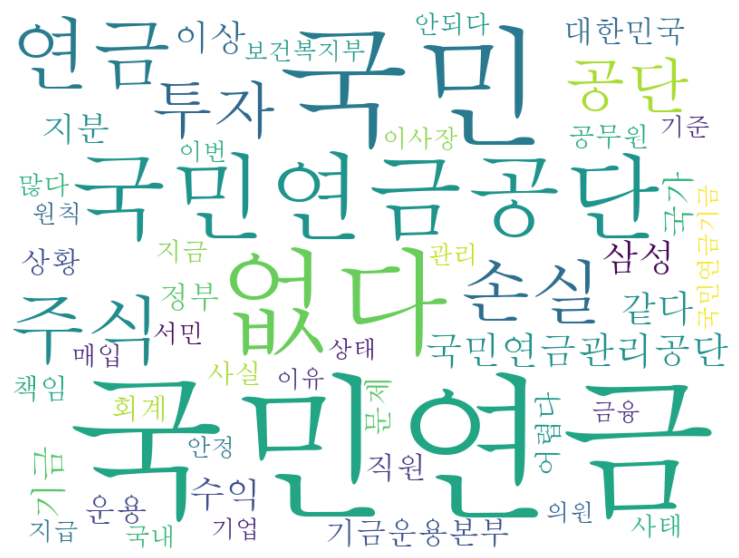

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(content_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')
#plt.title("근로복지공단 칭찬게시판 내용 키워드 TOP50", fontsize= 25)
# 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

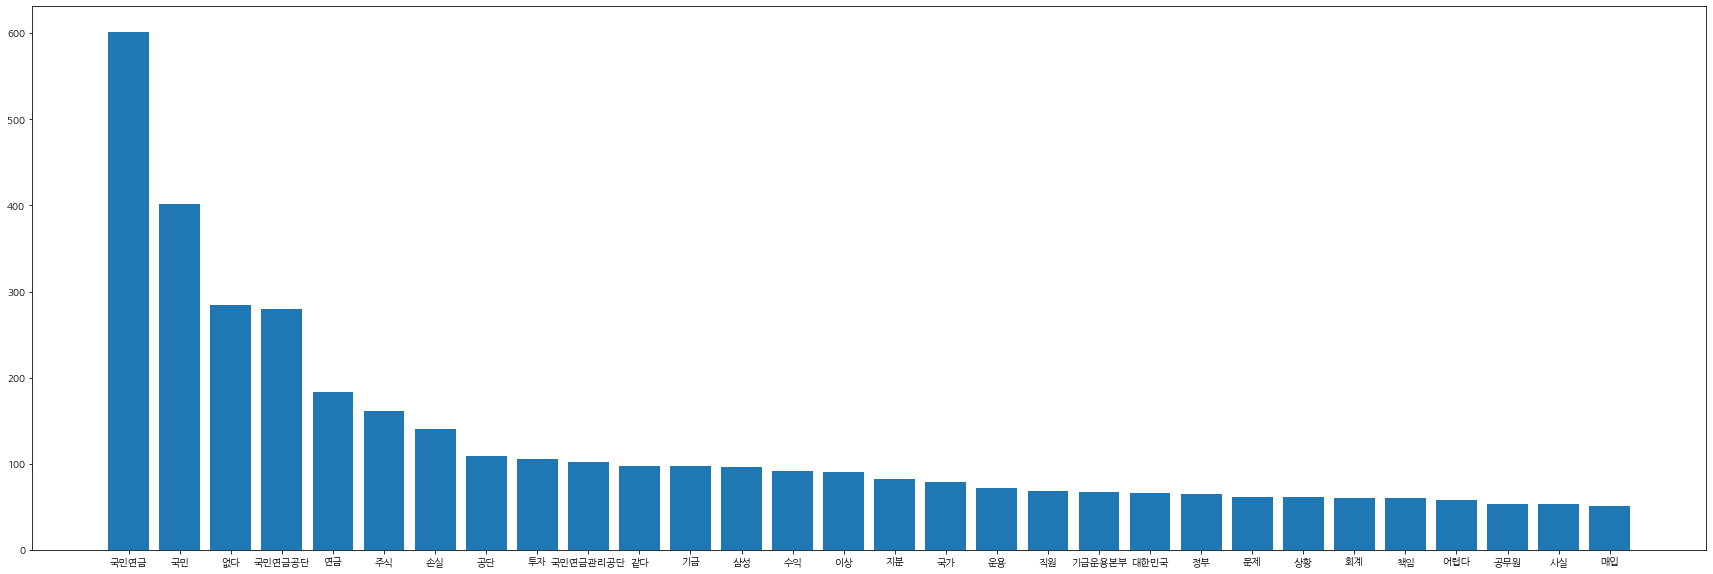

In [16]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_content_keys=[i for i in content_top50.keys()]
top_content_values=[i for i in content_top50.values()]

plt.figure(figsize= (30,10))
#plt.title("칭찬합시다 게시판 내용 키워드 Top30", fontsize=20)
plt.bar(list(top_content_keys[:30]), list(top_content_values[:30]))
plt.show()

In [17]:
#content_top_100 

content_top50_word2id = {w: i for i, w in enumerate(content_top50.keys())}
content_top30_word2id = {w: i for i, w in enumerate(content_top30.keys())}

content_top50_word2id

{'국민연금': 0,
 '국민': 1,
 '없다': 2,
 '국민연금공단': 3,
 '연금': 4,
 '주식': 5,
 '손실': 6,
 '공단': 7,
 '투자': 8,
 '국민연금관리공단': 9,
 '같다': 10,
 '기금': 11,
 '삼성': 12,
 '수익': 13,
 '이상': 14,
 '지분': 15,
 '국가': 16,
 '운용': 17,
 '직원': 18,
 '기금운용본부': 19,
 '대한민국': 20,
 '정부': 21,
 '문제': 22,
 '상황': 23,
 '회계': 24,
 '책임': 25,
 '어렵다': 26,
 '공무원': 27,
 '사실': 28,
 '매입': 29,
 '지금': 30,
 '사태': 31,
 '많다': 32,
 '안되다': 33,
 '국내': 34,
 '서민': 35,
 '이사장': 36,
 '지급': 37,
 '기준': 38,
 '관리': 39,
 '원칙': 40,
 '이번': 41,
 '국민연금기금': 42,
 '금융': 43,
 '기업': 44,
 '안정': 45,
 '이유': 46,
 '상태': 47,
 '보건복지부': 48,
 '의원': 49}

In [18]:
content_top50_id2word = {i: w for i, w in enumerate(content_top50.keys())}
content_top30_id2word = {i: w for i, w in enumerate(content_top30.keys())}
content_top50_id2word

{0: '국민연금',
 1: '국민',
 2: '없다',
 3: '국민연금공단',
 4: '연금',
 5: '주식',
 6: '손실',
 7: '공단',
 8: '투자',
 9: '국민연금관리공단',
 10: '같다',
 11: '기금',
 12: '삼성',
 13: '수익',
 14: '이상',
 15: '지분',
 16: '국가',
 17: '운용',
 18: '직원',
 19: '기금운용본부',
 20: '대한민국',
 21: '정부',
 22: '문제',
 23: '상황',
 24: '회계',
 25: '책임',
 26: '어렵다',
 27: '공무원',
 28: '사실',
 29: '매입',
 30: '지금',
 31: '사태',
 32: '많다',
 33: '안되다',
 34: '국내',
 35: '서민',
 36: '이사장',
 37: '지급',
 38: '기준',
 39: '관리',
 40: '원칙',
 41: '이번',
 42: '국민연금기금',
 43: '금융',
 44: '기업',
 45: '안정',
 46: '이유',
 47: '상태',
 48: '보건복지부',
 49: '의원'}

In [19]:
import numpy as np

# 50 단어 인접행렬
content_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in content_sentences_nouns_result:
    for wi, i in content_top50_word2id.items():
        if wi in sentence:
            for wj, j in content_top50_word2id.items():
                if i != j and wj in sentence:
                    content_adjacent_matrix_50[i][j] += 1
content_adjacent_matrix_50

array([[ 0, 75, 51, ..., 16,  0,  0],
       [75,  0, 34, ...,  2,  2,  0],
       [51, 34,  0, ...,  3,  2,  1],
       ...,
       [16,  2,  3, ...,  0,  0,  0],
       [ 0,  2,  2, ...,  0,  0,  1],
       [ 0,  0,  1, ...,  0,  1,  0]])

In [20]:
import numpy as np

# 50 단어 인접행렬
content_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in content_sentences_nouns_result:
    for wi, i in content_top30_word2id.items():
        if wi in sentence:
            for wj, j in content_top30_word2id.items():
                if i != j and wj in sentence:
                    content_adjacent_matrix_30[i][j] += 1
content_adjacent_matrix_30

array([[ 0, 75, 51, 31, 35, 64, 48, 35, 32, 15,  9, 72, 70, 38, 21, 33,
        29, 16, 16, 13,  6, 17, 13, 23, 48, 15,  8,  9, 38, 12],
       [75,  0, 34, 50, 51, 18, 17, 20,  4, 19, 23, 23,  7, 17, 23,  0,
        17, 17, 16, 14, 37, 18,  9,  2,  0, 11,  5, 12,  2,  0],
       [51, 34,  0, 36, 25,  2,  6, 12,  2,  8, 12,  8,  4,  2, 22,  0,
        10,  1,  8,  1,  7, 10, 29, 21,  0,  7,  6,  6,  3,  0],
       [31, 50, 36,  0, 13, 40, 22,  6,  4,  2,  7,  2, 10,  2,  8, 24,
        16, 14,  8, 27,  1,  6,  3, 13, 12, 26, 17,  2,  1, 25],
       [35, 51, 25, 13,  0,  6,  9, 15, 14,  9,  7,  9,  6,  3,  5,  0,
        12,  2, 11,  1,  1, 10,  5,  2,  0,  4,  1, 14,  5,  0],
       [64, 18,  2, 40,  6,  0, 21,  3, 31,  3,  1, 12,  9, 24,  2, 24,
         5, 12,  1, 13,  2,  2,  1,  1, 48,  5,  0,  0, 25, 36],
       [48, 17,  6, 22,  9, 21,  0,  7, 19,  7,  6,  3, 19, 14,  2,  0,
        16, 13,  4,  1,  3,  4,  2,  1, 12, 19,  0,  2,  0,  0],
       [35, 20, 12,  6, 15,  3,  7,  0,  

In [21]:
import networkx as nx

content_network_50 = nx.from_numpy_matrix(content_adjacent_matrix_50)
content_network_30 = nx.from_numpy_matrix(content_adjacent_matrix_30)
#list(title_network_50.adjacency())

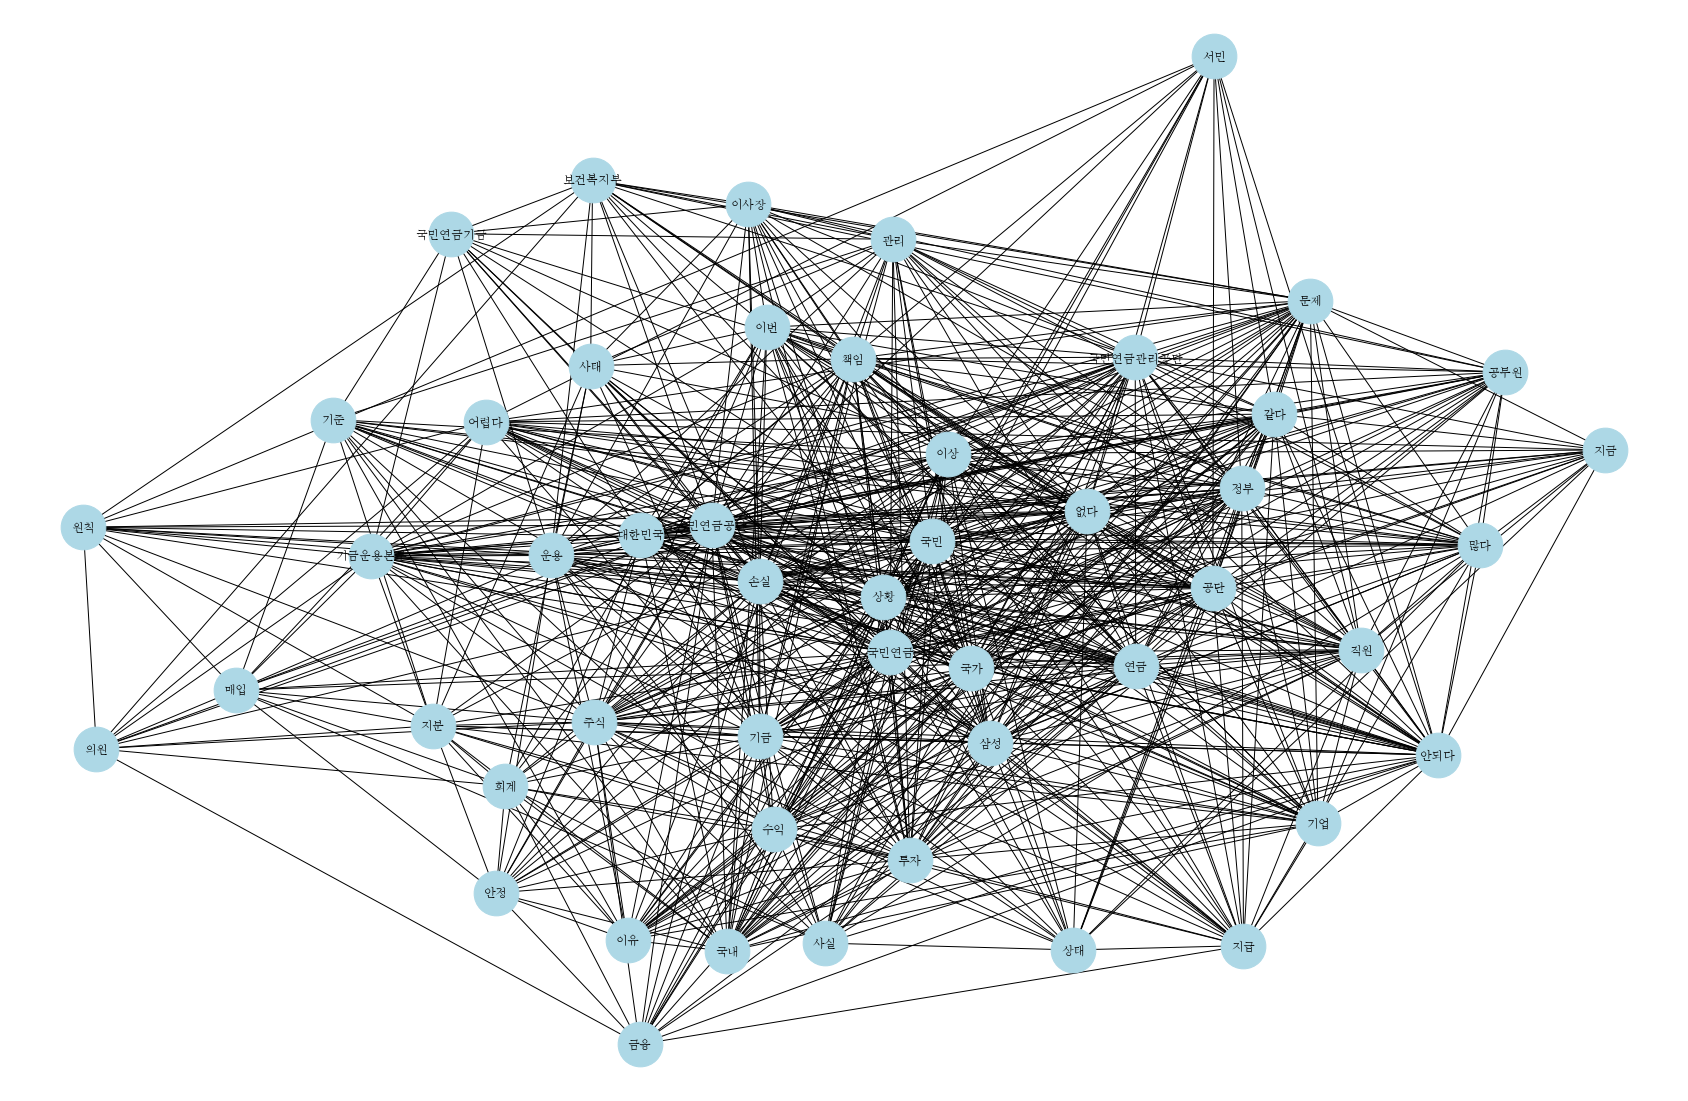

In [22]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(30, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(content_network_50, labels=content_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

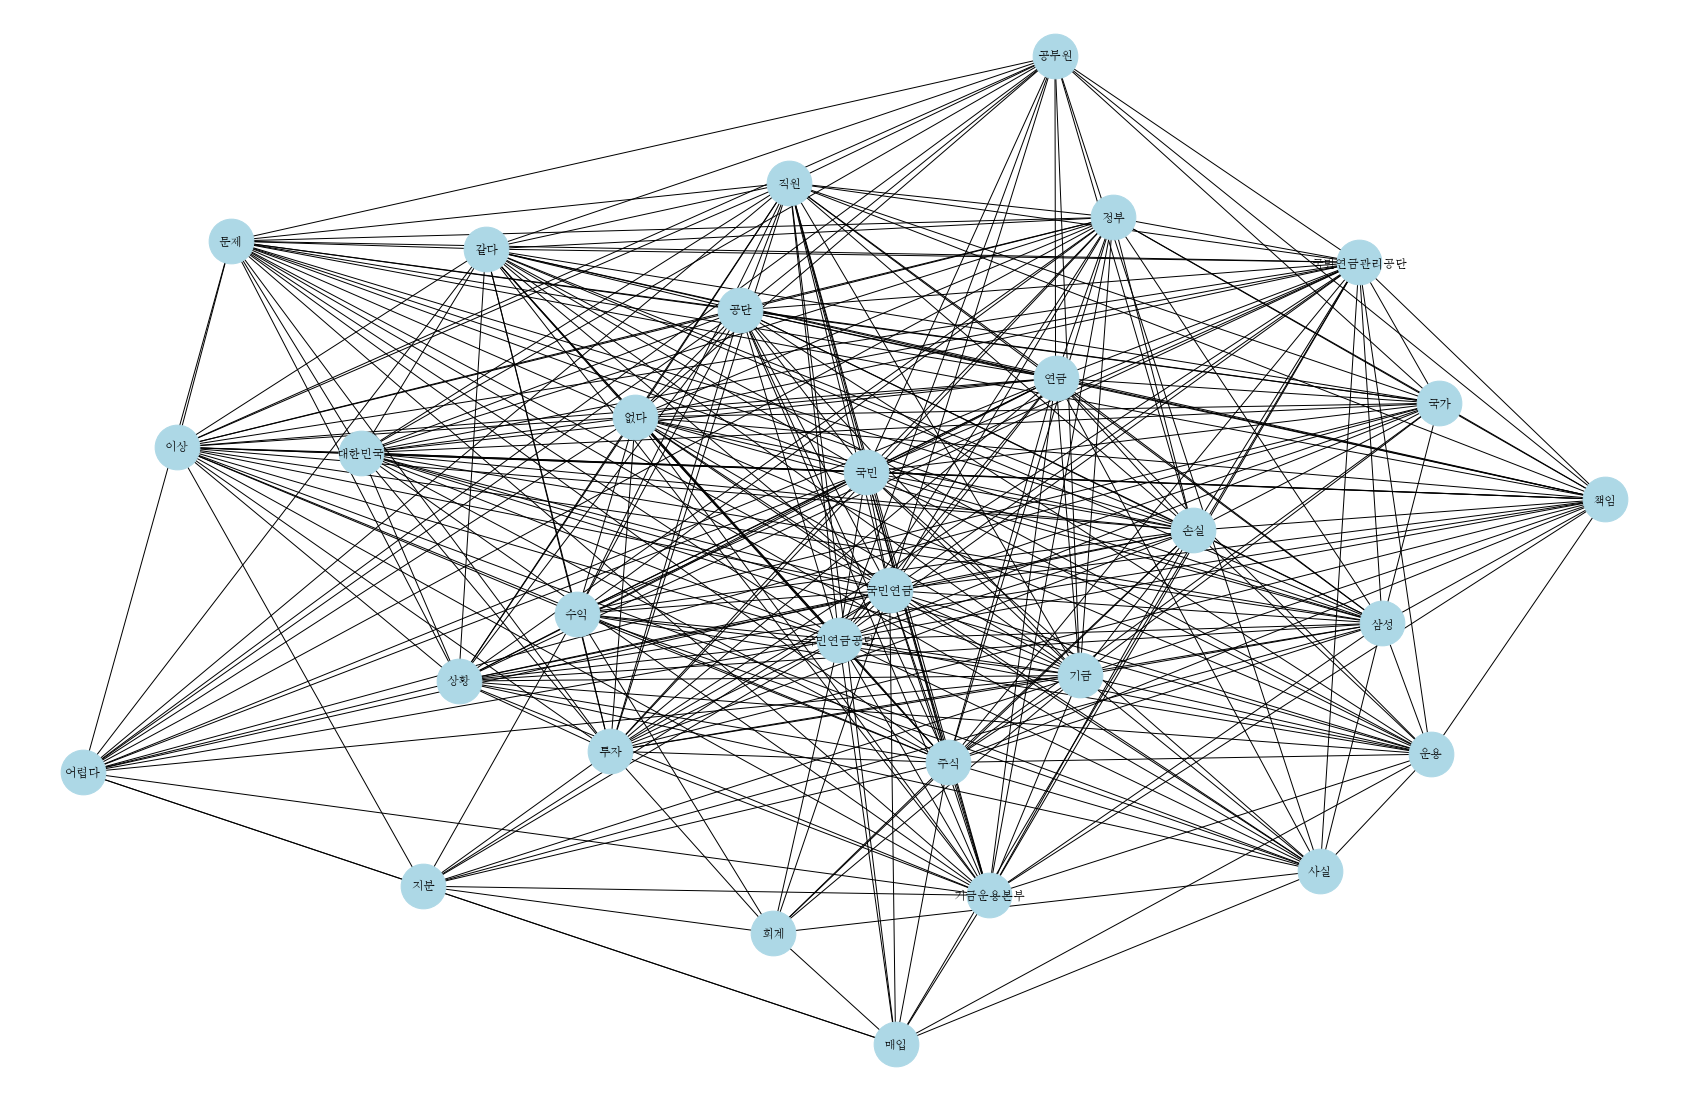

In [23]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(30, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(content_network_30, labels=content_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()